# Projekt TSP (Travel Salesman Problem)
### Autorzy: Aleksander Folfas, Zosia Jaworksa, Maciej Komosa, Kajetan Łodej, Natalia Łyś

In [9]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [10]:
# Wczytanie plików z danymi
TSP_29 = pd.read_excel('Dane_TSP_29.xlsx', header=None)
TSP_48 = pd.read_excel('Dane_TSP_48.xlsx', header=None)
TSP_76 = pd.read_excel('Dane_TSP_76.xlsx', header=None)
TSP_127 = pd.read_excel('Dane_TSP_127.xlsx', header=None)


In [11]:
TSP_76.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,NaN,1118.033989,3621.118612,3891.336531,5205.849883,4884.327282,4650.000000,4975.188439,6247.599539,6408.002809,...,13237.824595,12550.000000,11321.660656,16269.296236,17936.833611,18830.825792,18985.520799,10467.568963,3605.551275,3716.180835
1,1118.033989,NaN,2926.174978,3360.431520,4555.532131,4049.154603,3684.087404,3950.000000,5392.819300,5640.257086,...,13700.000000,13088.258096,11921.828719,16886.088949,17993.887851,18784.301957,18923.530326,9360.555539,3640.054945,3828.837944
2,3621.118612,2926.174978,NaN,700.000000,1629.439474,1367.754729,1627.882060,2193.171220,2700.000000,2789.265136,...,12345.545755,11958.469802,11011.925354,15890.641900,15686.698187,16304.370580,16419.881242,7864.636037,6470.896383,6689.730936
3,3891.336531,3360.431520,700.000000,NaN,1368.894810,1628.051903,2163.330765,2745.906044,2789.265136,2700.000000,...,11660.295880,11290.039858,10366.894424,15227.031884,15014.076728,15658.304506,15778.545560,8285.076946,6975.851203,7179.310552
4,5205.849883,4555.532131,1629.439474,1368.894810,NaN,1115.000448,2013.820498,2512.304321,1624.460834,1362.964783,...,11820.476852,11584.583419,10799.271874,15528.704808,14484.663372,14980.790133,15079.531591,7431.411239,8079.756989,8305.075135


In [12]:
# Ogólna funkcja wizualizacji trasy
def plot_route(route, distance_matrix, title):
    # Zmiana wartości NaN na 0
    distance_matrix.fillna(0, inplace=True)

    # MDS - Multidimensional Scaling 
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42,normalized_stress='auto')
    coordinates = mds.fit_transform(distance_matrix)

    # Wykres
    plt.figure(figsize=(10, 8))
    plt.scatter(coordinates[:, 0], coordinates[:, 1])

    # Dodanie numerów miast
    for i, txt in enumerate(range(len(coordinates))):
        plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]))

    # Narysowanie trasy
    for i in range(len(route) - 1):
        plt.plot([coordinates[route[i], 0], coordinates[route[i + 1], 0]],
                [coordinates[route[i], 1], coordinates[route[i + 1], 1]], 'k-')

    # Podpisanie pierwszego i ostatniego miasta (po odwiedzeniu ostatniego miasta nastepuje powrót do pierwszego )
    plt.text(coordinates[route[0], 0], coordinates[route[0], 1], 'First', fontsize=12, ha='right', color='green', weight='bold')
    plt.text(coordinates[route[-1], 0], coordinates[route[-1], 1], 'Last', fontsize=12, ha='right', color='red', weight='bold')

    plt.title('Wizualizacja optmalnej trasy dla {} uzyskaznej przez algorytm Tabu Search'.format(title))
    plt.show()

In [13]:
def plot_improvement(results, title):
    plt.figure(figsize=(8, 6))
    plt.plot(results, 'o-')
    plt.title('Wykres poprawy wyniku w kolejnych iteracjach dla {}'.format(title))
    plt.xlabel('Iteracja')
    plt.ylabel('Wynik')
    plt.show()

## Tabu Search
### TSP_48

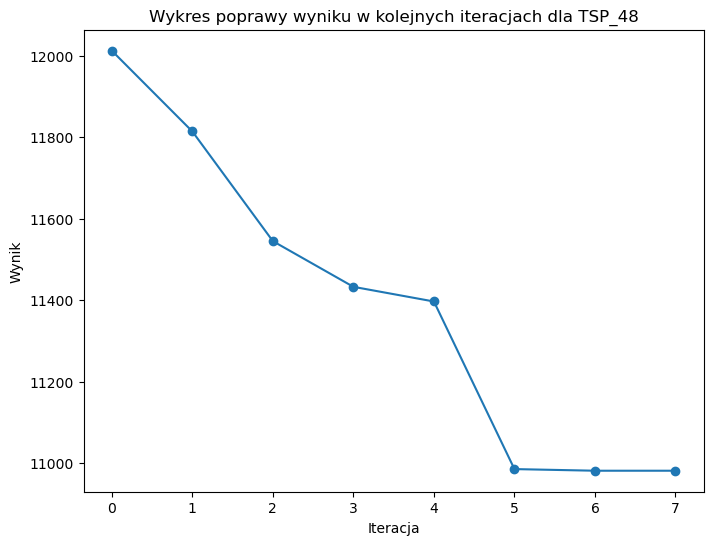

In [14]:
# Wykres poprawy wyniku dla TSP_48 z trasą początkową utworzoną przez NN

values = [12012, 11814, 11545, 11433, 11397, 10986, 10982, 10982] # Wyniki
plot_improvement(values, 'TSP_48')

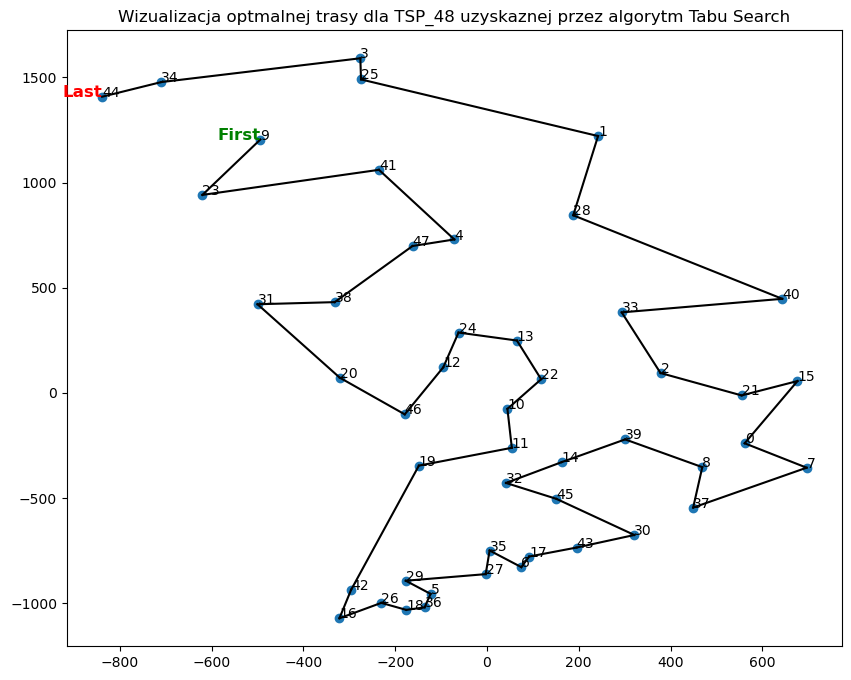

In [15]:
# Wizualizacja trasyt dla najlepszego rozwiazania TSP_48
route = [9, 23, 41, 4, 47, 38, 31, 20, 46, 12, 24, 13, 22, 10, 11, 19, 42, 16, 26, 18, 36, 5, 29, 27, 35, 6, 17, 43, 30, 45, 32, 14, 39, 8, 37, 7, 0, 15, 21, 2, 33, 40, 28, 1, 25, 3, 34, 44] # Trasa

plot_route(route, TSP_48, 'TSP_48')

### TSP_76

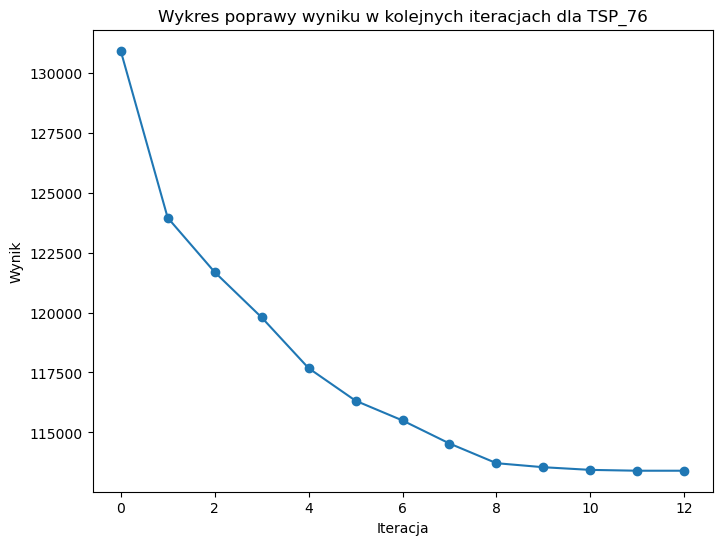

In [16]:
# Wykres poprawy wyniku dla TSP_76 z trasą początkową utworzoną przez NN

values = [130921, 123955, 121688, 119798, 117681, 116323, 115499, 114538, 113717, 113549, 113438, 113403, 113403] # Wyniki
plot_improvement(values, 'TSP_76')

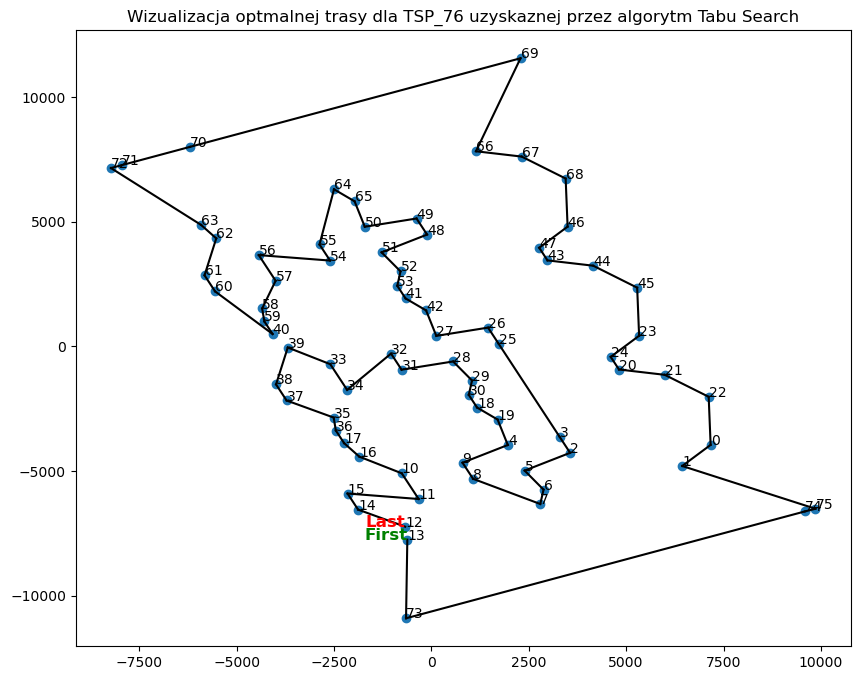

In [17]:
# Wizualizacja trasyt dla najlepszego rozwiazania TSP_76
route = [13, 73, 74, 75, 1, 0, 22, 21, 20, 24, 23, 45, 44, 43, 47, 46, 68, 67, 66, 69, 70, 71, 72, 63, 62, 61, 60, 40, 59, 58, 57, 56, 54, 55, 64, 65, 50, 49, 48, 51, 52, 53, 41, 42, 27, 26, 25, 3, 2, 5, 6, 7, 8, 9, 4, 19, 18, 30, 29, 28, 31, 32, 34, 33, 39, 38, 37, 35, 36, 17, 16, 10, 11, 15, 14, 12] # Trasa

plot_route(route, TSP_76, 'TSP_76')

### TSP_127

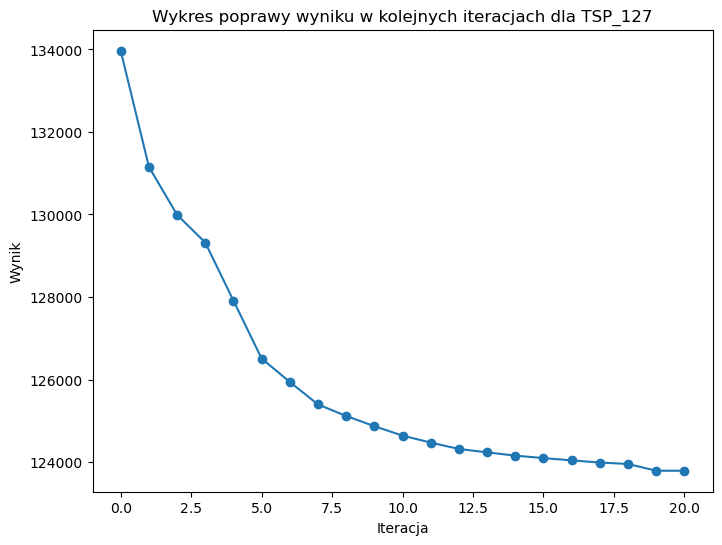

In [20]:
# Wykres poprawy wyniku dla TSP_127 z trasą początkową utworzoną przez NN

values = [133970, 131157, 129993, 129320, 127913, 126509, 125941, 125395, 125116, 124869, 124640, 124471, 124316, 124234, 124155, 124095, 124040, 123987, 123953, 123789, 123789] # Wyniki

plot_improvement(values, 'TSP_127')

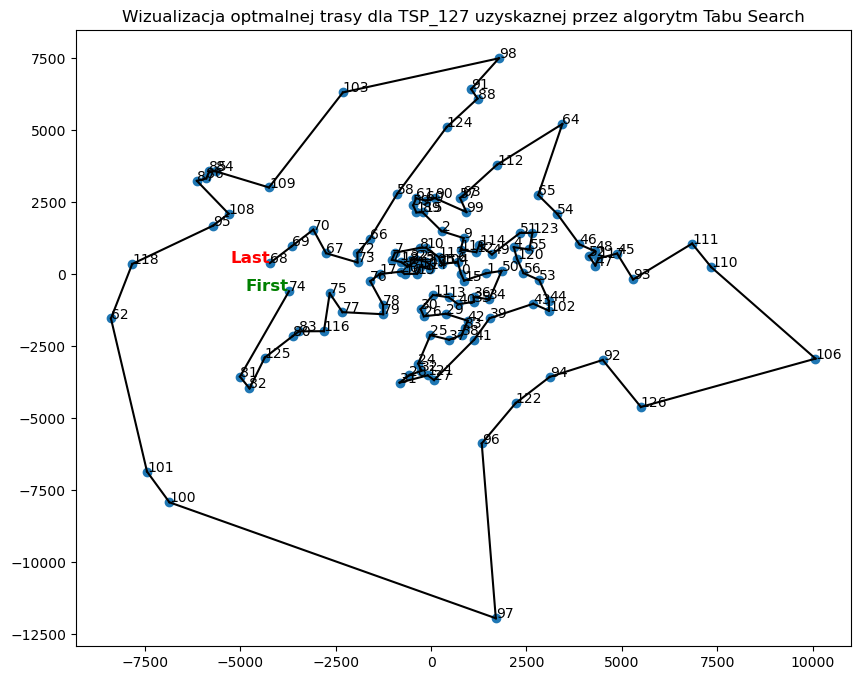

In [21]:
# Wizualizacja trasyt dla najlepszego rozwiazania TSP_127
route = [74, 81, 82, 125, 80, 83, 116, 75, 77, 79, 78, 76, 17, 20, 16, 19, 107, 14, 105, 5, 23, 22, 3, 21, 18, 71, 7, 8, 10, 113, 104, 6, 0, 15, 1, 50, 34, 36, 35, 40, 13, 11, 30, 26, 29, 42, 33, 38, 37, 25, 24, 32, 28, 31, 121, 27, 41, 39, 43, 102, 44, 53, 56, 120, 4, 55, 123, 51, 49, 114, 12, 119, 9, 2, 89, 115, 59, 61, 60, 90, 99, 57, 63, 112, 64, 65, 54, 46, 48, 52, 47, 117, 45, 93, 111, 110, 106, 126, 92, 94, 122, 96, 97, 100, 101, 62, 118, 95, 108, 87, 86, 85, 84, 109, 103, 98, 91, 88, 124, 58, 66, 72, 73, 67, 70, 69, 68] # Trasa

plot_route(route, TSP_127, 'TSP_127')